In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("insurance (2).csv")
df# sex smoker region should be treated or encoded
# check the exel for diff values


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [3]:
df.shape

(1338, 7)

In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe().T# skewness can be measured by comparing mean and median(50%)

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [7]:
df.info()# we do  not know whether there are hidden missing values 
# be diplomatic

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(array([ 30., 127., 234., 319., 288., 195.,  96.,  32.,  14.,   3.]),
 array([15.96 , 19.677, 23.394, 27.111, 30.828, 34.545, 38.262, 41.979,
        45.696, 49.413, 53.13 ]),
 <BarContainer object of 10 artists>)

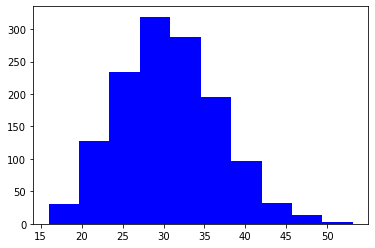

In [8]:
plt.hist(df.bmi,color="b")

(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

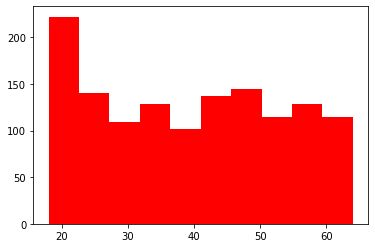

In [9]:
plt.hist(df.age,color="r") # it is uniformly distributed

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

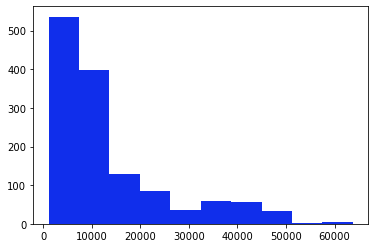

In [10]:
plt.hist(df.charges,color="#102EEB")# highly skewed

In [11]:
df[["age","bmi","charges"]].skew()
#skew of bmi very less
# age uniformly
#charges highly skewed

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

C:\Users\mdars\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

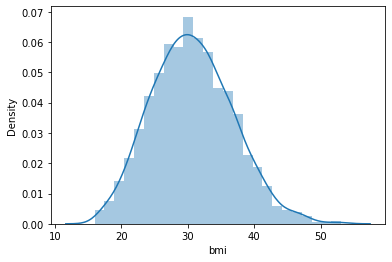

In [12]:
sns.distplot(df['bmi'])

C:\Users\mdars\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

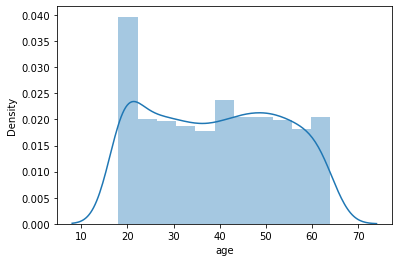

In [13]:
sns.distplot(df['age'])

C:\Users\mdars\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

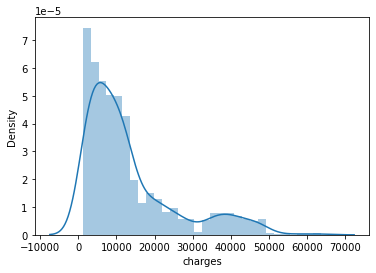

In [14]:
sns.distplot(df['charges'])

# Outliers

###we dont remove outliers all the time instead bring it under 3std

In [15]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

<AxesSubplot:>

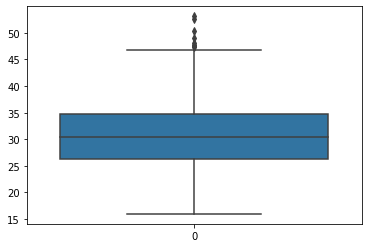

In [16]:
sns.boxplot(data=df.bmi)

<AxesSubplot:>

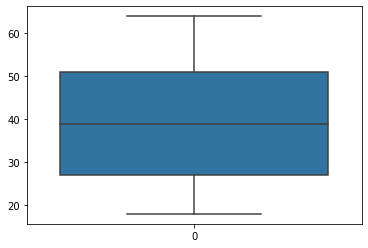

In [17]:
sns.boxplot(data=df.age)

<AxesSubplot:>

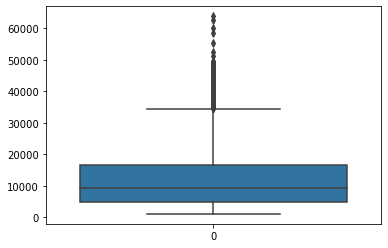

In [18]:
sns.boxplot(data=df.charges)

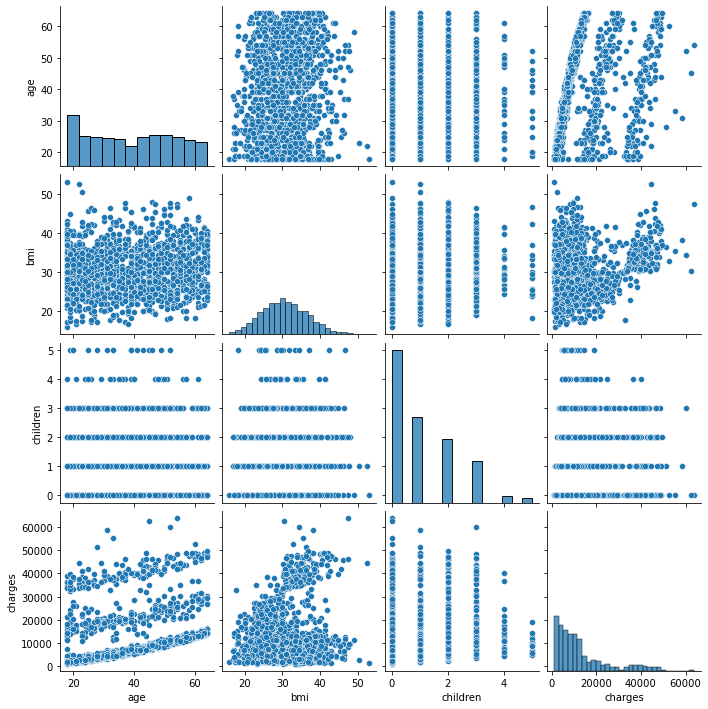

In [19]:
sns.pairplot(df)

C:\Users\mdars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

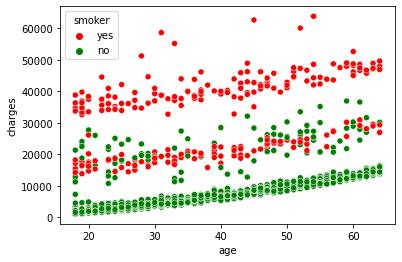

In [20]:
sns.scatterplot(df['age'], df['charges'], hue=df.smoker,palette=["r","g"])

C:\Users\mdars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='charges'>

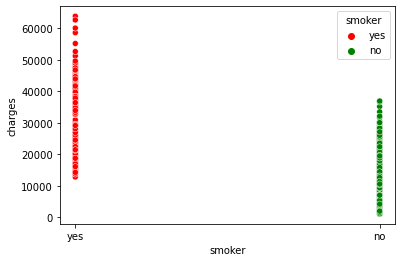

In [21]:
sns.scatterplot(df['smoker'], df['charges'], hue=df.smoker,palette=["r","g"])

# BMI

In [22]:
# we can say hypothesis gives 95 per cent sure better than plot

In [23]:
from scipy import stats
Ho = "charges of smoker and non smoker are the same"
Ha = "charges of smoker and non smoker are not the same"

x=np.array(df[df.smoker=="yes"].charges)
y=np.array(df[df.smoker=="no"].charges)

t, p_value = stats.ttest_ind(x,y,axis=0)

if p_value < 0.05:
    print(f'{Ha} as thr p_value ({p_value})<0.05')
else:
          print(f'{Ho} asthe p_value ({p_value})>0.05')

charges of smoker and non smoker are not the same as thr p_value (8.271435842179102e-283)<0.05


# Does bmi of men and women differ significantly

C:\Users\mdars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='bmi'>

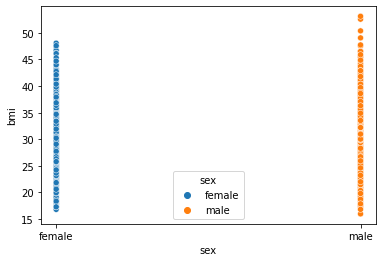

In [24]:
sns.scatterplot(df.sex,df.bmi,hue=df.sex)

C:\Users\mdars\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='bmi'>

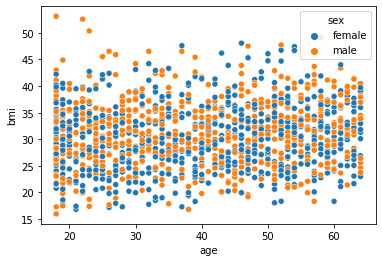

In [25]:
sns.scatterplot(df.age,df.bmi,hue=df.sex)

<AxesSubplot:xlabel='bmi', ylabel='sex'>

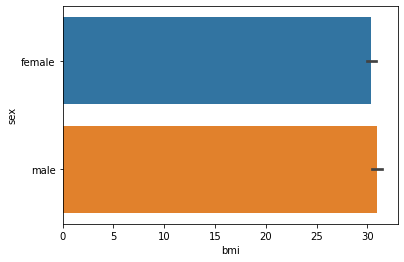

In [26]:
sns.barplot(x =df.bmi , y=df.sex)

In [27]:
Ho = "bmi of male and female are same"
Ha = "bmi of male and female are not the same"

x=np.array(df[df.sex=="male"].bmi)
y=np.array(df[df.sex=="female"].bmi)

t, p_value = stats.ttest_ind(x,y,axis=0)

if p_value < 0.05:
    print(f'{Ha} as thr p_value ({p_value})<0.05')
else:
          print(f'{Ho} asthe p_value ({p_value})>0.05')

bmi of male and female are same asthe p_value (0.08997637178984932)>0.05


# Does the charges of the gender  differ significantly

In [28]:
Ho = "Gender has no effect on charges"
Ha = "Gender has no effect on charges"

x=np.array(df[df.sex=="male"].charges)
y=np.array(df[df.sex=="female"].charges)

t, p_value = stats.ttest_ind(x,y,axis=0)

if p_value < 0.05:
    print(f'{Ha} as thr p_value ({p_value})<0.05')
else:
          print(f'{Ho} asthe p_value ({p_value})>0.05')

Gender has no effect on charges as thr p_value (0.03613272100592976)<0.05


<AxesSubplot:xlabel='sex', ylabel='charges'>

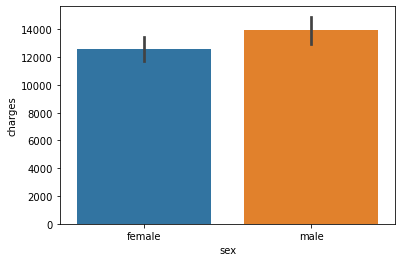

In [29]:
sns.barplot(x=df.sex,y=df.charges)

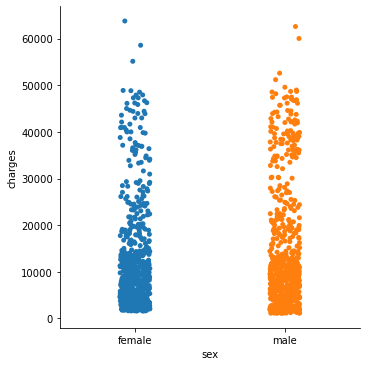

In [30]:
sns.catplot(x="sex", y="charges", jitter=True, data=df)

C:\Users\mdars\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\mdars\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


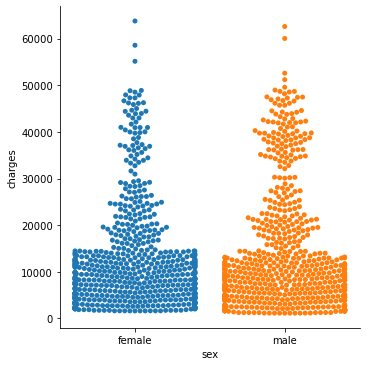

In [31]:
sns.catplot(x="sex", y="charges", kind='swarm', data=df)

# Proportion of somokers is diff w.r.t gender

In [32]:
Ho = "Gender has no effect on smoking habits"
Ha="Gender has effects on smoking habits"
crosstab=pd.crosstab(df['smoker'],df['sex'])
chi, p_type, dof, ex = stats.chi2_contingency(crosstab)
if p_value<0.05:
    print(f'{Ha} as the p_value({p_value} < 0.05')
else:
    print(f'{Ho} as the p_value({p_value} > 0.05')
crosstab

Gender has effects on smoking habits as the p_value(0.03613272100592976 < 0.05


sex,female,male
smoker,,
no,547,517
yes,115,159


#region and smoking habits

In [33]:
Ho = "region has no effect on smoking habits"
Ha="region has effects on smoking habits"
crosstab=pd.crosstab(df['smoker'],df['region'])
chi, p_type, dof, ex = stats.chi2_contingency(crosstab)
if p_value<0.05:
    print(f'{Ha} as the p_value({p_value} < 0.05')
else:
    print(f'{Ho} as the p_value({p_value} > 0.05')
crosstab

region has effects on smoking habits as the p_value(0.03613272100592976 < 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


In [34]:
# Anova test 
import copy
Ho = "No. of children has no effect on bmi"
Ha="No. of children has an effect on bmi"

female_df =copy.deepcopy(df[df["sex"]=="female"])

zero= female_df[female_df.children==0]["bmi"]
one = female_df[female_df.children==1]["bmi"]
two = female_df[female_df.children==2]["bmi"]

f_stat,p_vale = stats.f_oneway(zero,one,two)

if p_value<0.05:
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has an effect on bmi as the p_value (0.036) < 0.05
